In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import keras
from matplotlib import pyplot as plt

In [2]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('Alzheimer_s Dataset/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='sparse',
                                                 shuffle=True)

test_set = train_datagen.flow_from_directory('Alzheimer_s Dataset/train',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='sparse')


Found 8061 images belonging to 4 classes.
Found 8061 images belonging to 4 classes.


In [3]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(4,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=preds)

for i,layer in enumerate(model.layers):
  print(i,layer.name)

for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

model.compile(optimizer='Adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
history=model.fit(train_generator,
                   steps_per_epoch=step_size_train,
                            epochs=25,
                            verbose=1,
                    validation_data=train_generator)

model.save("models/mobilenet.h5")

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

c:\Program Files\Python310\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


251/251 [==============================] - 813s 3s/step - loss: 0.6124 - accuracy: 0.7429 - val_loss: 0.4874 - val_accuracy: 0.8277
Epoch 2/25
251/251 [==============================] - 823s 3s/step - loss: 0.3225 - accuracy: 0.8718 - val_loss: 2.8807 - val_accuracy: 0.6094
Epoch 3/25
251/251 [==============================] - 838s 3s/step - loss: 0.1938 - accuracy: 0.9299 - val_loss: 0.3173 - val_accuracy: 0.9173
Epoch 4/25
251/251 [==============================] - 788s 3s/step - loss: 0.1231 - accuracy: 0.9580 - val_loss: 1.6218 - val_accuracy: 0.7451
Epoch 5/25
251/251 [==============================] - 825s 3s/step - loss: 0.0830 - accuracy: 0.9733 - val_loss: 1.3342 - val_accuracy: 0.6956
Epoch 6/25
251/251 [==============================] - 805s 3s/step - loss: 0.0852 - accuracy: 0.9741 - val_loss: 2.1636 - val_accuracy: 0.6162
Epoch 7/25
251/251 [==============================] - 745s 3s/step - loss: 0.1021 - accuracy: 0.9672 - val_loss: 0.3505 - val_accuracy: 0.8731
Epoch 8/25

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_7692\1003151364.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')


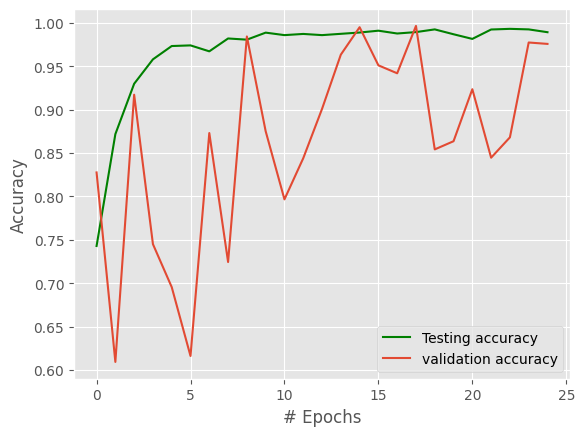

C:\Users\ymts0585\AppData\Local\Temp\ipykernel_7692\1003151364.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['loss'],'r',label='Testing accuracy',color='green')


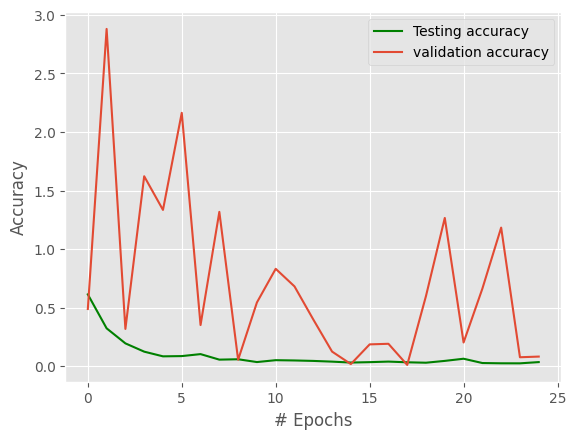

0.9892888069152832


In [4]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/mobilenet_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Testing accuracy',color='green')
plt.plot(history.history['val_loss'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("models/mobilenet_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)
